# Structural Similarity
### Till 22.03.2017 (task in the end of the file)

During this seminar we will:
1. Consider some node similarity measures, particularly: *Euclidean Distance*, *Correlation Coefficient* and *Cosine Distance*
2. Take a look at *[Cuthill-McKee](http://en.wikipedia.org/wiki/Cuthill%E2%80%93McKee_algorithm)* node reordering procedure
3. Calculate *Assortative mixing coefficient* for some **[Game Of Thrones](http://cdn.meme.am/instances/55597956.jpg)** network

In [2]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import scipy.spatial as spt
import matplotlib.pyplot as plt
from math import *
plt.xkcd()
import networkx as nx
%matplotlib inline

### Task 1 - Similarities Calculation

1. Calculate *Euclidean Distance*, *Correlation Coefficient* and *Cosine Distance* for some toy-network (Zachary again?) and for [Les Miserables](http://www-personal.umich.edu/~mejn/netdata/lesmis.zip) dataset
2. Visualize them

**HINT:**
For correlation coeficient you can use *np.corrcoef()*, for the distances you may implement them on your own or use *scipy.spatial.distance.pdist()*

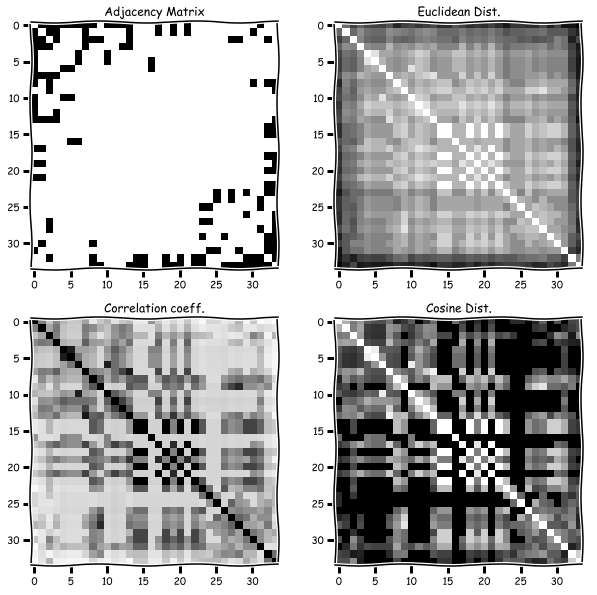

In [13]:
# Put your code here..
#
#
G = nx.karate_club_graph()
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

def plotDist(A):
    
    f, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0, 0].imshow(A, cmap = 'Greys', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    
    D = np.corrcoef(A)
    ax[1, 0].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')
    
    dVec = spt.distance.pdist(A, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax[0, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')
    
    dVec = spt.distance.pdist(A, metric = 'cosine')
    D = spt.distance.squareform(dVec)
    ax[1, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')
    
plotDist(A)   
    

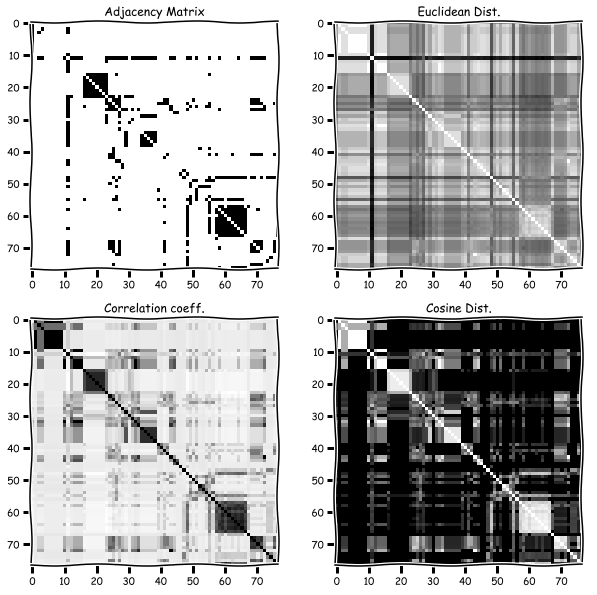

In [3]:
G = nx.read_gml('lesmis.gml')
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

plotDist(A)

### Task 2 - Node Reordering

Without special preprocess procedures graph adjacency matrix can look very noisy and hide network's structure (just look at the matrices above). Offcourse usually you don't know the structure itself (communities, groups of closelly connected nodes, etc.) unless it is given, however there are some procedures of node reordering that provides a better view of the network's adjacency matrix.

*[Reverse Cuthill-McKee](http://en.wikipedia.org/wiki/Cuthill%E2%80%93McKee_algorithm)* finds permutation of the nodes that minimizes the **bandwidth** of the matrix, which is calculated as:
$$ \theta = \max_{a_{ij} > 0}|i-j|$$
Unformally, this algorithm puts some *mass* on the diagonal of adjacency matrix.

Run this reordering with *nx.utils.reverse_cuthill_mckee_ordering(G)* and compare with the results above

[23, 29, 26, 22, 20, 18, 15, 14, 27, 9, 28, 25, 24, 32, 30, 33, 2, 1, 31, 3, 13, 8, 7, 19, 21, 17, 12, 11, 4, 0, 10, 6, 5, 16] 34


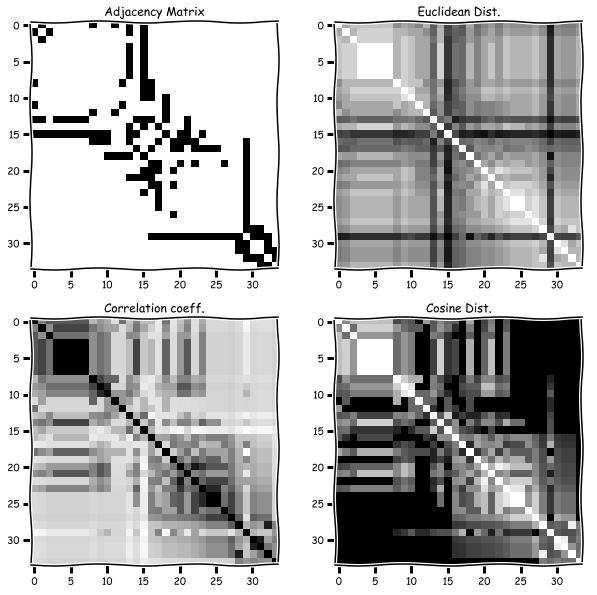

In [38]:
# Put your code here
#
#
G = nx.karate_club_graph()

# run procedure
cm = nx.utils.reverse_cuthill_mckee_ordering(G)
# get permutation
l = [n for n in cm]
print l, len(A)

A = nx.to_numpy_matrix(G)
A = np.asarray(A)
# apply reordering
A = A[np.ix_(l,l)]

plotDist(A)



###  Task 3 - Assortative Mixing

For this task you should download some data, convert it to network and calculate assortative mixing coefficient. Particularly, download [*GOT data*](https://github.com/FutureUnleashed/OSS/tree/master/Neo4j/GOT_Tree): [*characters*](https://www.hse.ru/data/2016/03/15/1127718485/characters.csv) and [*events*](https://www.hse.ru/data/2016/03/15/1127718470/events.csv) datasets.

The first dataset provides information on characters of the Game Of Thrones universe. The second one -- describes some events that have occured with them during the story. We are interested in **killing** events since they can be considered as binary relations and consequently -- graphs. 
The attribute wrt which we are going to compute assortative mixing is called "Team".

We will explore datasets with *pandas* module. The list of usefull functions:
* read_csv()
* characters.head()
* dropna
* set_index('characterID')['Team'].to_dict()
* events[events['event'] == 'killed']

In [7]:
# Put your code here
#
#
events = pd.read_csv('events.csv')
characters = pd.read_csv('characters.csv')


In [7]:
characters.head()

,characterID,Name,Team,isDead,isCaptured,isHurt,title,prefix
0,2,Addam Marbrand,Lannister,0,0,0,knight,Ser
1,1894,Adrack Humble,Greyjoy,0,0,0,NaN,NaN
2,7,Aegon Frey (Jinglebell),Frey (North),0,0,0,NaN,NaN
3,8,Aegon I Targaryen,Targaryen,1,0,0,King of the Seven Kingdoms,King
4,12,Aegon Targaryen,Targaryen,1,0,0,prince,Prince


In [8]:
kill_events = events[events['event'] == 'killed']
kill_events = pd.DataFrame(kill_events, index = None, columns=['characterID', 'event', 'withID'])
kill_events = kill_events.dropna()

In [9]:
kill_events.head()

,characterID,event,withID
7,1808,killed,2068.0
9,1825,killed,1808.0
25,557,killed,456.0
289,1186,killed,1528.0
518,755,killed,629.0


In [16]:
G = nx.DiGraph()

for row, data in kill_events.iterrows():
    killer = data[2]
    killed = data[0]
    G.add_edge(killer, killed)

In [17]:
ch_team = characters.set_index('characterID')['Team'].to_dict()
for k in ch_team.keys():
    if k not in G.nodes():
        del ch_team[k]

In [18]:
nx.set_node_attributes(G, 'Team', ch_team)

In [19]:
nx.assortativity.attribute_assortativity_coefficient(G, 'Team')
as_dict = nx.assortativity.attribute_mixing_dict(G, 'Team')
as_dict

{'Bolton (Lannister)': {},
 'Bolton (North)': {'Bolton (Lannister)': 1,
  'Greyjoy': 1,
  'Stark': 3,
  'none': 1},
 'Brave Companions': {'Lannister': 2, 'none': 1},
 'Citadel': {},
 'Drogo': {'Drogo': 1, 'Targaryen': 1},
 'Essos': {'Targaryen': 2},
 'Faceless Men': {'Citadel': 1, 'Lannister': 2},
 'Frey (Lannister)': {},
 'Frey (North)': {'Stark': 3},
 'Greyjoy': {'Greyjoy': 4,
  'Stark': 4,
  'Tyrell': 1,
  'Wildlings (north of wall)': 1},
 'Lannister': {'Frey (Lannister)': 2,
  'Lannister': 1,
  'Robert': 2,
  'Stark': 4,
  'none': 1},
 'Littlefinger': {'Littlefinger': 1, 'Robert': 1},
 'Martell': {'Robert': 1},
 'Night Watch': {'Night Watch': 4,
  'Tyrell': 1,
  'Wildlings (north of wall)': 5},
 'Red God': {'Renly': 2, 'Stannis': 4},
 'Renly': {'Brave Companions': 3, 'Stark': 1, 'none': 1},
 'Robert': {'Brave Companions': 2,
  'Essos': 1,
  'Martell': 1,
  'Robert': 5,
  'Second Sons': 1,
  'Stark': 4},
 'Second Sons': {},
 'Stannis': {},
 'Stark': {'Bolton (Lannister)': 1,
  'Brav

# Home Task for Testing Assortativity

1. Experiment with GoT data, use different similarity metrics. Explain the results. You may choose another dataset on any TV channel serialization.

2. Find the example of temporal network, that increases assortativity at early stages and became higly disassortative later.
Explain this process.

3. Take biological network. Let's prun the largest-degree nodes of a growing scale-free network has the effect of decreasing the degree correlation coefficient (assortativity) in a stable way, while keeping both the trait of a power-law degree distribution and the main properties of network's robustness. Explain the results. Propose a generative model for disassortative growing scale-free networks.


#### 1.

Let's try network without node reordering first:

/home/mdldml/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mdldml/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


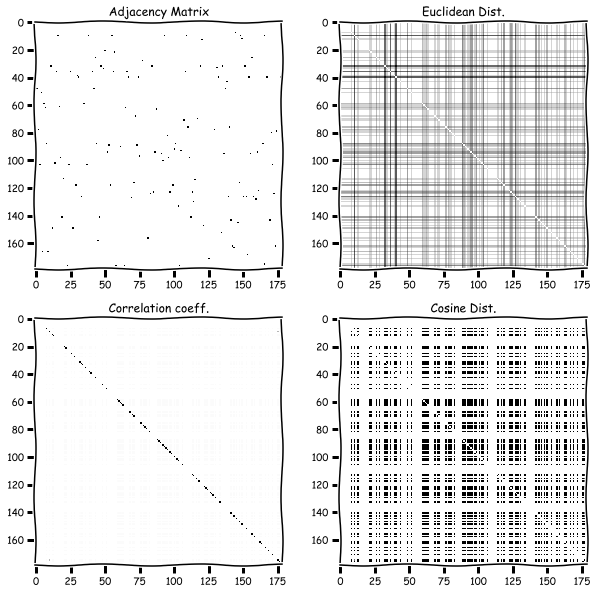

In [20]:
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

plotDist(A)

As we see, without reordering we don't have much information about similarity of the vertices. Let's try Cuthill-McKee reordering: if we make undirected graph from our directed one, use reordering algorithm and apply it on the directed one, adjacency matrix bandwidth should be at least as narrow as in undirected case.

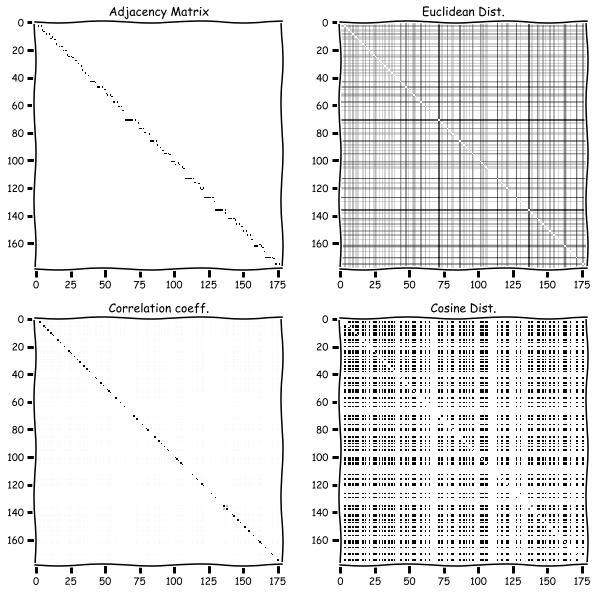

In [21]:
GU = G.to_undirected()
cm = nx.utils.reverse_cuthill_mckee_ordering(GU)
# get permutation
l = [int(n) for n in cm]

A = nx.adjacency_matrix(G, nodelist=l).toarray()

# apply reordering

plotDist(A)

Well, at least we tried! Unfortunately, this reordering does not give us any useful information. We may also try grouping characters by team attribute and see what happens: 

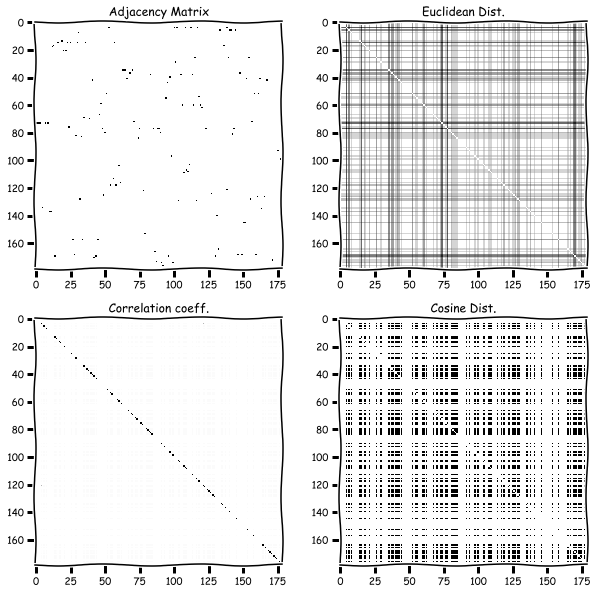

In [23]:
teams = set([G.node[k]['Team'] for k in G.nodes()])
team_nodelist = []
for team in teams:
    for u in G.nodes():
        if G.node[u]['Team'] == team:
            team_nodelist.append(u)

A = nx.adjacency_matrix(G, nodelist=team_nodelist).toarray()
plotDist(A)

Now adjacency matrix does not have narrow bandwidth, but we see more patterns in similarities maps. Unfortunately, that is not enough. This happens because GoT has many teams and members of each team may kill not only other teams but some of their own team as well.

Note that assortativity coefficient is not very close by absolute value to 1.

In [24]:
nx.assortativity.attribute_assortativity_coefficient(G, 'Team')


0.09728747729123602

#### 2.


Popular social networks can be a good example of such temporal networks.

Judging by vk.com, we can see that when that social network first apppeared on the web, there were some active users (they were communicating with each other and had added each other as friends) and other accounts (who did not find anything interesting in that web resource). But now that everyone in Russia has VK page, we have many VK-based communities and much media content, the situation is more like active users and very active users. The latter (celebrities, famous bloggers, politicians, etc.) have thousands of subscriptions from simple users, so the network has big chances to be disassortative now.

That can be checked by downloading all (public) profiles with user IDs ranges in 1-1000, 1-100000, 1-10000000, ... up to the modern state.

#### 3.

We use *[Yeast](https://gephi.org/datasets/yeast.gexf.zip)* dataset for this task:

In [46]:
G = nx.read_gexf('yeast.gexf')
nx.degree_pearson_correlation_coefficient(G)

-0.084581056829766577

Let's check what happens when dropping (approximately) 0.1%, 1%, 5% and 15% of nodes with highest degree:

In [60]:
nodes = sorted(G.nodes(), reverse=True, key=lambda node: G.degree(node))

for percentage in [0.001, 0.01, 0.05, 0.15]:    
    G1 = G.copy()
    threshold_degree = G1.degree(nodes[int(percentage * len(nodes))])
    nodes_to_remove = [node for node in G1.nodes() if G1.degree(node) >= threshold_degree]
    G1.remove_nodes_from(nodes_to_remove)
    coeff = nx.degree_pearson_correlation_coefficient(G1)
    print("percentage %f: %f" % (percentage, coeff))

percentage 0.001000: -0.076670
percentage 0.010000: -0.080802
percentage 0.050000: -0.030346
percentage 0.150000: -0.198006


It's also obvious that if the power law does not break if we delete nodes with some specific degrees, since it just changes domain of (linear) degree-amount function and not range.

Introduce modified Barabasi-Albert model with parameter $c$: now probability of new edge to appear is proportional to degree of node in power $c$.

In [25]:
def gen_BAsq_iter(G, m, c):
    u = G.number_of_nodes()
    G.add_node(u)
    
    nodes_to_choose = sum([[node] * int(G.degree(node) ** c) for node in G.nodes()], [])
    nodes_to_link = set()
    while len(nodes_to_link) < m:
        nodes_to_link.add(rnd.choice(nodes_to_choose))
            
    for v in nodes_to_link:
        G.add_edge(u, v)

def get_BAsq_initial(n0, m0):
    return nx.gnm_random_graph(n0, m0)

def gen_BAsq(n0, m0, iterations, m, c):
    G = get_BAsq_initial(n0, m0)
    
    for t in xrange(iterations):
        gen_BAsq_iter(G, m, c)
            
    return G

In [26]:
G = gen_BAsq(5, 8, 1000, 3, 1.2)

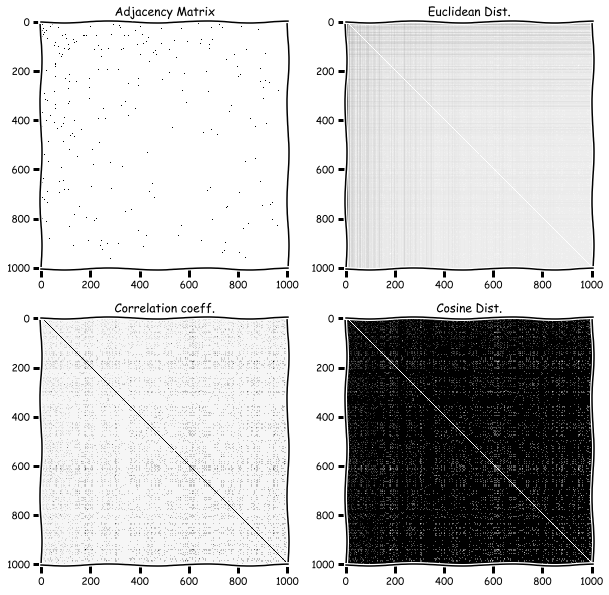

In [27]:
A = nx.adjacency_matrix(G).toarray()
plotDist(A)

In [48]:
nx.degree_pearson_correlation_coefficient(G)

-0.20917169470410302

As we see, this network is slightly disassortative.

In [28]:
def linregression(G):
    degrees = sorted([G.degree(v) for v in G.nodes()])
    freqs_binned = get_binned_freqs(degrees, base=1.2)
    n = len(freqs_binned)
    bincenters = np.array(sorted(freqs_binned.keys()))
    yh = np.array([freqs_binned[key] for key in bincenters])

    x_est = np.log(bincenters[np.ix_(yh != 0)])
    y_est = np.log(yh[np.ix_(yh != 0)])

    X = np.vstack([np.ones(len(x_est)), x_est]).T
    Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

    # idx = np.argsort(x_est)
    yt = np.exp(X[:,:].dot(Beta))
    xt = np.exp(X[:, 1])

    fig, ax = plt.subplots()
    fig.set_size_inches(7, 7)
    ax.loglog(bincenters, yh, '.r', label='Data') 
    ax.loglog(xt, yt, 'b', label='Line')
    plt.ylabel('count')
    plt.xlabel('$x$')
    ax.legend(loc='upper right', shadow=True)
    plt.title('Estimated $\\alpha$ = {0:1.4f}'.format(-Beta[1]), fontsize=20)

    det_coeff = 1 - np.sum(np.square(X.dot(Beta) - y_est)) / np.sum(np.square(np.mean(y_est) - y_est))
    print("determinancy coefficient: %f" % det_coeff)
    print(Beta)
    
    return -Beta[1]

In [29]:
def get_freqs(degrees):
    freqs = {}
    
    for degree in degrees:
        freqs.setdefault(degree, 0)
        freqs[degree] += 1.0 / len(degrees)
        
    return freqs

def get_binned_freqs(degrees, base=2):
    freqs = get_freqs(degrees)
    freqs_binned = {}
    
    for degree in freqs.keys():
        f_bin_upper = 1 if degree < 1 else base ** (ceil(log(degree, base)))
        f_bin_lower = 0 if degree < 1 else f_bin_upper / base
        f_bin = 0.5 * (f_bin_lower + f_bin_upper)
        freqs_binned.setdefault(f_bin, 0)
        freqs_binned[f_bin] += freqs[degree]
        
    return freqs_binned

def get_freqs_cumulative(degrees):
    freqs = get_freqs(degrees)
    freqs_cumulative = {}
    acc = 0
    
    for degree in sorted(freqs.keys()):
        acc += freqs[degree]
        freqs_cumulative[degree] = acc
        
    return freqs_cumulative

def PDF(G, log_base=1.5):
    plt.figure()
    degrees = sorted([G.degree(v) for v in G.nodes()])
    freqs_binned = get_binned_freqs(degrees, base=log_base)
    plt.loglog(sorted(freqs_binned.keys()), [freqs_binned[key] for key in sorted(freqs_binned.keys())])  

def CDF(G):
    plt.figure()
    degrees = sorted([G.degree(v) for v in G.nodes()])
    freqs_cumulative = get_freqs_cumulative(degrees)
    plt.loglog(sorted(freqs_cumulative.keys()), [freqs_cumulative[key] for key in sorted(freqs_cumulative.keys())])

determinancy coefficient: 0.865763
[-0.44083866 -1.39703566]


1.3970356595332132

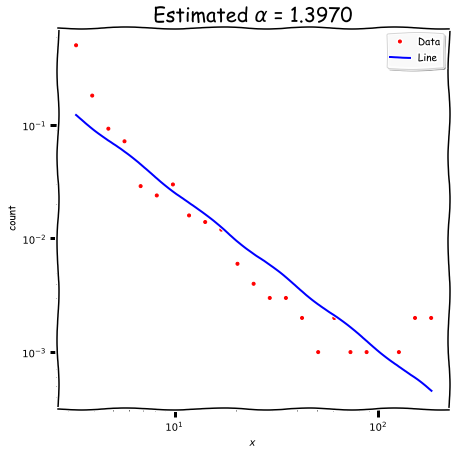

In [30]:
linregression(G)

As we see, it is close to scale-free (though some effects for lowest and highest degree nodes appear). Increasing parameter $c$ increases disassortativity and breaks the power law of model.